In [81]:
from fastai import *
from fastai.data.all import *
from fastai.vision.all import *
from pathlib import Path
from dataclasses import dataclass

In [22]:
tipos_pulmoes = 'NORMAL', 'PNEUMONIA'
path = Path('./dfs/pneumonia/train')

In [53]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(256)
)
data_loader = data.dataloaders(path, batch_size=3)

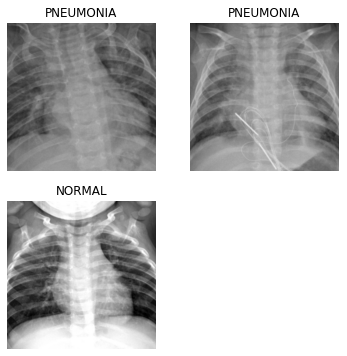

In [54]:
data_loader.valid.show_batch(max_n=16, nrows=2)

In [84]:
learn = cnn_learner(data_loader, resnet50, metrics=accuracy, cbs=SaveModelCallback())

In [85]:
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time
0,0.415343,0.522276,0.815916,00:56


Better model found at epoch 0 with valid_loss value: 0.5222764015197754.


epoch,train_loss,valid_loss,accuracy,time
0,0.329750,0.160274,0.930010,01:27
1,0.299245,0.128710,0.951103,01:27
2,0.293315,0.160589,0.943432,01:28
3,0.316938,0.152998,0.953979,01:26
4,0.284648,0.141760,0.958773,01:26
5,0.245048,0.213477,0.913710,01:28
6,0.272916,0.208028,0.906999,01:28
7,0.286022,0.147701,0.953979,01:28
8,0.256630,0.520410,0.848514,01:28
9,0.354230,0.167015,0.939597,01:27


Better model found at epoch 0 with valid_loss value: 0.1602741926908493.
Better model found at epoch 1 with valid_loss value: 0.12871000170707703.
Better model found at epoch 12 with valid_loss value: 0.10537347942590714.


In [86]:
learn_interpreter = ClassificationInterpretation.from_learner(learn)

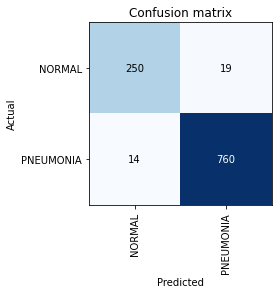

In [87]:
learn_interpreter.plot_confusion_matrix()

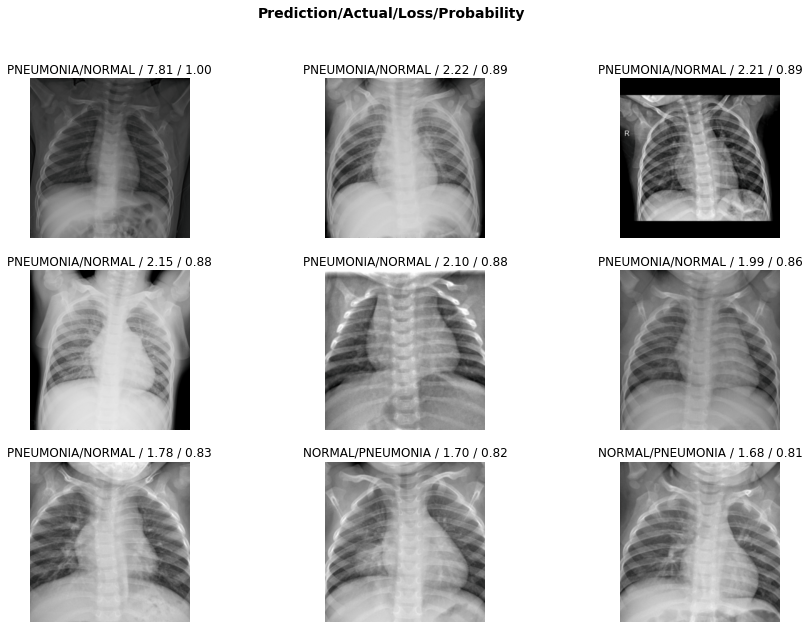

In [88]:
learn_interpreter.plot_top_losses(9, figsize=(15,10))

In [89]:
from fastai.vision.widgets import ImageClassifierCleaner
data_set_cleaner =  ImageClassifierCleaner(learn, max_n=10)

In [90]:
data_set_cleaner

In [91]:
for i in data_set_cleaner.delete():
    image = data_set_cleaner.fns[i]
    print(image)